<center><h1><span>WR 304 Assignment 3: Precipitation</span></h1></center>
<center><h3><span>Cunningham Creek / Leadville Airport</span></h3></center>
<center><h3>Jared Grove</h3></center<br>
<center><h3>9 September 2020</h3></center>

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reads data file
df = pd.read_csv('Leadville_Lake_County_Airport.csv')

# creates a MONTH column and TAVG column
df['MONTH'] = pd.to_datetime(df['DATE']).dt.strftime('%B')
df['TAVG'] = df[['TMAX', 'TMIN']].mean(axis=1)

# creates dataframe with only the columns needed for the assignment
df_main = df[['MONTH', 'PRCP', 'TAVG']]

df_main

,MONTH,PRCP,TAVG
0,September,0.0,10.00
1,September,0.0,10.55
2,September,0.0,12.25
3,September,3.6,9.15
4,September,5.8,9.45
...,...,...,...
360,August,0.8,11.70
361,August,0.0,10.80
362,August,0.0,11.40
363,August,0.0,11.95


In [4]:
# group by month and find sum of each column
df_monthsum = df_main.groupby('MONTH').sum()

# reindex with sorted date column and drop TAVG for plot
new_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']


df_monthsum = df_monthsum.reindex(new_index).reset_index().drop(columns=['TAVG'])

df_monthsum

,MONTH,PRCP
0,January,16.2
1,February,35.2
2,March,23.1
3,April,62.8
4,May,50.4
5,June,25.4
6,July,42.4
7,August,15.1
8,September,29.6
9,October,14.7


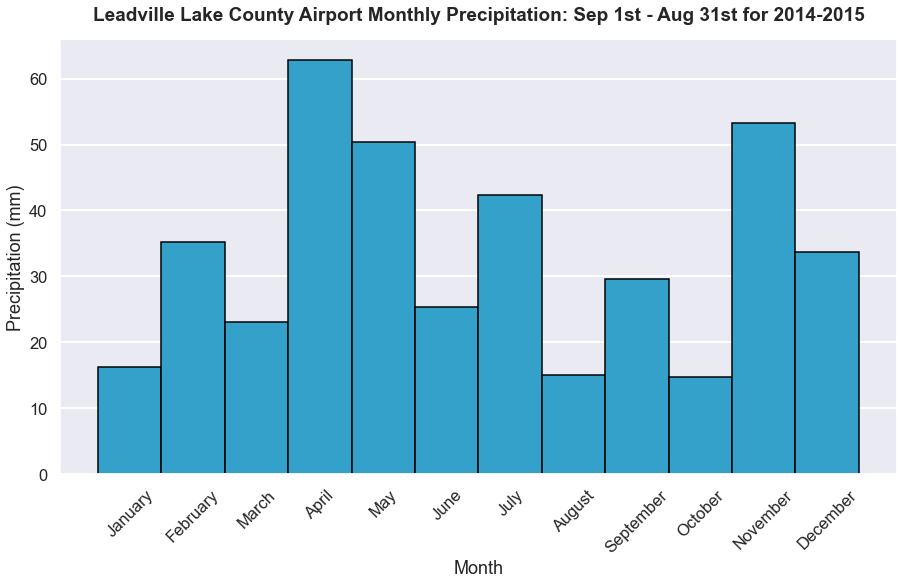

In [5]:
# sets style of plot
plt.figure(figsize=(15,8))
sns.set(style='dark')
sns.set_context('talk')

# plots bargraph from dataframe
# sns.barplot(x='MONTH',
#             y='PRCP',
#             data=df_monthsum)

# plots/formats labels
plt.title('Leadville Lake County Airport Monthly Precipitation: Sep 1st - Aug 31st for 2014-2015',
          weight='bold',
          y=1.03).set_fontsize('19')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.bar(df_monthsum['MONTH'], 
        df_monthsum['PRCP'], 
        align='center', 
        width=1, 
        edgecolor='black',
        facecolor='#33A1C9')
plt.grid(color='w', 
         linestyle='-', 
         linewidth=2, 
         axis='y')
        

plt.show()

In [10]:
round(df_monthsum['PRCP'].sum(), 2)

401.9

In [6]:
df_mainfilter = df_main[(df_main['TAVG'] <= 4) & (df_main['PRCP'] > 0)]

df_mainfilter

,MONTH,PRCP,TAVG
30,October,0.3,2.00
31,October,1.3,0.65
38,October,3.3,3.35
39,October,0.8,3.05
41,October,5.6,0.60
...,...,...,...
258,May,0.5,3.10
259,May,7.1,3.65
260,May,0.5,2.00
264,May,3.0,1.45


In [7]:
df_mainfilter['MONTH'].value_counts()

February    15
December    13
November    12
May         11
April       11
January      9
March        9
October      8
Name: MONTH, dtype: int64

In [8]:
len(df_mainfilter)

88

In [11]:
round(len(df_mainfilter)/len(df_main) * 100, 2)

24.11

# Questions

**2A. Which month has the greatest precipitation, and which has the least?**<br>
The highest month of precipitation was recorded in April with 62.8mm of precipitation and the lowest month of precipitation was recorded in October with 14.7mm of precipitation.<br>

**2B. What is the total annual precipitation at your site?**<br>
The total annual precipitation at Leadvillie Lake County airport amounted to 401.9mm.

**2C. Using days with precipitation greater than 0, and average daily temperatures of 4
degrees C or less, as a threshold for a probability of 0.5 or more that the precipitation will
be snow, determine how many days this could occur, and what percentage of the total days
it could occur**<br>
The number of days where 50% chance of snow could occur are 88 and the percentage of this occuring in the year is 24.11%. 

**3. The DFIR (Double Fence Intercomparison Reference) fence and precipitation gauge
combination was designed to mimic what type of natural condition for sheltering of a precipitation
gauge, particularly in places with harsh climatic conditions?**<br>'
Double fences are used to mimic natural bush sheltering and also provide the best estimate of "ground true" precipitation. Some areas being studied don't have natural bush sheltering due to their harsh climatic conditions.

**4. What types of losses must solid precipitation measurements be adjusted for? List three types.**<br>
The three types of losses that solid precipitation must be adjusted for are, wetting loss, evaporation loss, and wind induced undercatch.

**5. What does the term “trace” precipitation mean?**<br>
Trace precipitation is the amount of precipitation that is greater than zero but too small to be measured with standard units. In the report trace precipitation must be considered a non-zero value when adjusting precipitation data. 

**6. When were the first precipitation intercomparison projects carried out, as in what century?**<br>
The first precipitation intercomparison projects were carried out at the end of the 17th century.

**7. What percentage of actual snowfall does a DFIR gauge catch? This can be a range of values.**<br>
The DFIR gauge catches 92% to 96% of actual snowfall.
